# Convolutional Neural Networks

Realizaremos un ejercicio descrito en el blog www.aprendemachinelearning.com para hacer reconocimiento de imágenes.

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [5]:
imgpath = "D:\DatasetsAi_Resized\DatasetAi_50x50"

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\.'
C:\Users\chuy-\AppData\Local\Temp\ipykernel_23804\3554430335.py:1: SyntaxWarning: invalid escape sequence '\D'
  imgpath = "D:\DatasetsAi_Resized\DatasetAi_50x50"
C:\Users\chuy-\AppData\Local\Temp\ipykernel_23804\3554430335.py:13: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


leyendo imagenes de  D:\DatasetsAi_Resized\DatasetAi_50x50
D:\DatasetsAi_Resized\DatasetAi_50x50\Gato 1
D:\DatasetsAi_Resized\DatasetAi_50x50\Hormiga 21912
D:\DatasetsAi_Resized\DatasetAi_50x50\Mariquita 22618
D:\DatasetsAi_Resized\DatasetAi_50x50\Perro 22618
D:\DatasetsAi_Resized\DatasetAi_50x50\Tortuga 20427
Directorios leidos: 5
Imagenes en cada directorio [21913, 22618, 22618, 20427, 21840]
suma Total de imagenes en subdirs: 109416


# Creamos las etiquetas

In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  109416


In [7]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 Gato
1 Hormiga
2 Mariquita
3 Perro
4 Tortuga


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (87532, 50, 50, 3) (87532,)
Testing data shape :  (21884, 50, 50, 3) (21884,)


Text(0.5, 1.0, 'Ground Truth : 3')

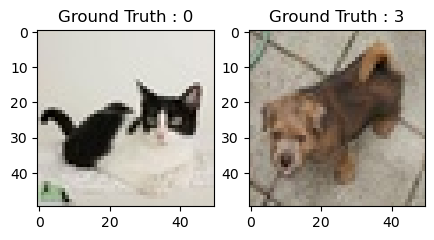

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(70025, 50, 50, 3) (17507, 50, 50, 3) (70025, 5) (17507, 5)


# Creamos el modelo de CNN

In [15]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 128 # cantidad de imágenes que se toman a la vez en memoria

In [16]:
# Bloque 1
sport_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same', input_shape=(64,64,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.25))

# Bloque 2
sport_model.add(Conv2D(64, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.25))

# Bloque 3
sport_model.add(Conv2D(128, kernel_size=(3, 3), activation='linear', padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(BatchNormalization())
sport_model.add(MaxPooling2D(pool_size=(2, 2)))
sport_model.add(Dropout(0.4))

# Clasificación final
sport_model.add(Flatten())
sport_model.add(Dense(64, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

\\?\C:\Users\chuy-\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
\\?\C:\Users\chuy-\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [17]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     2,560,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,563,781 (9.78 MB)

 Trainable params: 2,563,781 (9.78 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
sport_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR),
    metrics=['accuracy']
)


# Entrenamos el modelo: Aprende a clasificar imágenes

In [19]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 90s 162ms/step - accuracy: 0.4712 - loss: 1.3322 - val_accuracy: 0.5495 - val_loss: 1.1044
Epoch 2/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.5194 - loss: 1.1121 - val_accuracy: 0.5697 - val_loss: 0.9954
Epoch 3/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.5434 - loss: 1.0566 - val_accuracy: 0.5855 - val_loss: 0.9734
Epoch 4/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.5590 - loss: 1.0265 - val_accuracy: 0.6222 - val_loss: 0.9251
Epoch 5/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.5734 - loss: 0.9991 - val_accuracy: 0.6155 - val_loss: 0.9126
Epoch 6/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.5852 - loss: 0.9814 - val_accuracy: 0.6392 - val_loss: 0.8908
Epoch 7/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 87s 159ms/step - accuracy: 0.5914 - loss: 0.9653 - val_accuracy: 0.6194 - val_loss: 0.8938
Epoch 8/40
548/548 ━━━━━━━━━━━━━━━━━━━━ 86s 157ms/step - accuracy: 0.6012 - loss: 0

In [52]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("animals_mnist_1capa_densa_40epochs_50x50.keras")


# Evaluamos la red

In [53]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6550 - loss: 0.8583


In [54]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.8583201766014099
Test accuracy: 0.6549534201622009


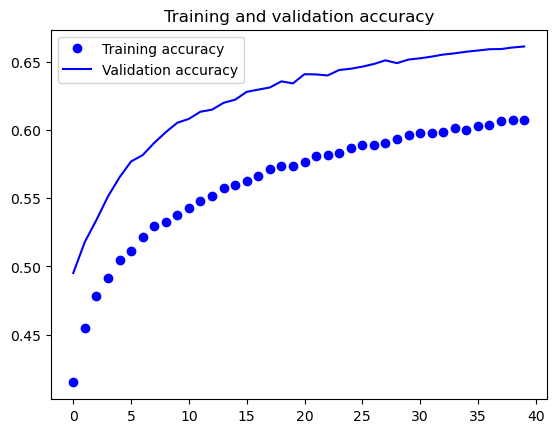

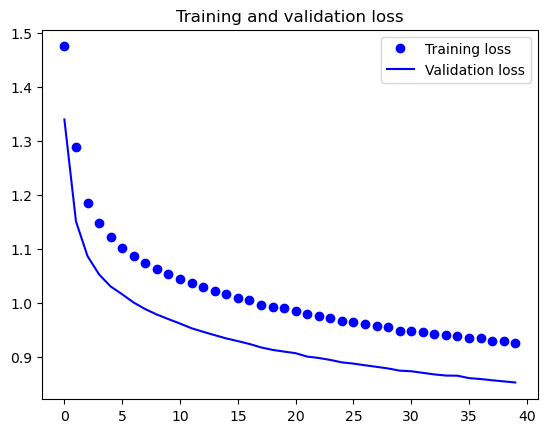

In [55]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
predicted_classes2 = sport_model.predict(test_X)

684/684 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


In [57]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [58]:
predicted_classes.shape, test_Y.shape

((21884,), (21884,))

# Aprendamos de los errores: Qué mejorar

Found 14333 correct labels


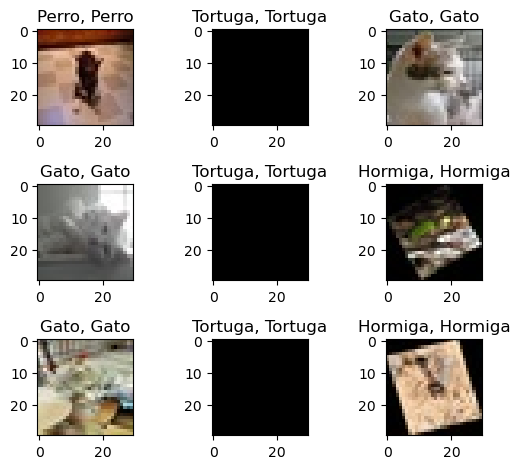

In [59]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 7551 incorrect labels


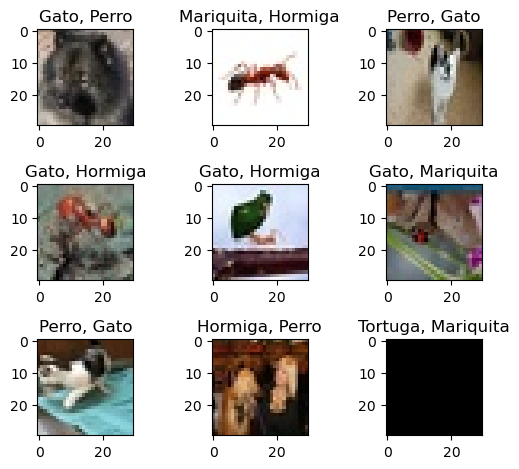

In [60]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(50,50,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [61]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.55      0.77      0.64      4328
     Class 1       0.58      0.47      0.52      4461
     Class 2       0.64      0.60      0.62      4619
     Class 3       0.57      0.47      0.51      4089
     Class 4       0.93      0.96      0.94      4387

    accuracy                           0.65     21884
   macro avg       0.65      0.65      0.65     21884
weighted avg       0.66      0.65      0.65     21884



# Prediccion de una nueva imagen

In [31]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['basket.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

ModuleNotFoundError: No module named 'skimage'